# STAT 201 Final Report

*Group Members: Devvrat Tiwari, Cindy Cui, Richard Luo, Blasius Boniarga, Nilay Kumar.*

**TA**: *Daniel Zhezlov*

# Artist Followers vs. Song Popularity on Spotify


# Introduction

What impacts a song’s popularity? Do bigger artists consistently release more popular songs? or are established, industry veterans able to get away with sub-par song releases? In the digital age, online influence and followers are often considered synonymous with success in various domains, including the music industry. This project aims to analyze data from Spotify's Top 200 Weekly Global Charts to explore the relationship between an artist's Spotify following and the popularity of their songs. 

Specifically, we seek to answer the question: **"Is there a significant difference in the mean popularity of songs between artists with more than 1 million followers and those with fewer than 1 million followers?"**

Analyzing Spotify’s Global Top 200, we uncover the influence that the metric: “Spotify followers” had on “song popularity” in 2020 and 2021; however we see several inconsistencies, where a wide range of artists followers made the top 200 list, from as little as 4,883 followers, all the way to 83,337,783. We use 1 million followers as a benchmark to an artist's influence over mainstream as evidence from (Aguiar, Waldfogel, 2018) to indicate that artists reaching the one million follower point attain subjective credibility over the spotify atmosphere. Understanding this relationship may offer insights into the dynamics of online music consumption and marketing efficacy (Soares Araujo, Pinheiro de Cristo, Giusti, 2019). 

Our response variable for this question is the popularity of songs, which is a value between 0 and 100. The statistic we will calculate from our response variable is the mean popularity score of songs for each category. We will also analyze the interquartile range of the popularity score. 

## Describing the Dataset
Our dataset includes all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. We consider our population to be any song released onto the internet, and our dataset to be our sample of this population.

Each song in our dataset is one observation, and the columns are features of the songs, such as the highest position that a song has been in the Spotify Top 200 Weekly Global Charts in 2020 and 2021, the number of times a song has made this chart, the overall tempo of the track, and more.

# Preliminary Results

We begin by analyzing our data. First, we load our libraries and set our seed. 

In [17]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)

set.seed(1)

Now we read our dataset from the web, and clean and wrangle it into a tidy format. We will use the two columns `Popularity` and `Artist Followers`.

In [18]:
#Loading the dataset
spotify_data <- read_csv("https://github.com/cinadia/stat-201-project/raw/main/data/spotify_dataset.csv", show_col_types = FALSE) %>%
    select("Artist Followers", "Popularity")

# Clean the data: Remove commas from 'Artist Followers' and convert to numeric
spotify_data$Artist.Followers <- as.numeric(gsub(",", "", spotify_data$`Artist Followers`)) 

spotify_data <- spotify_data |>
                    select(Popularity, Artist.Followers)
                    
# Remove NA values
spotify_data <- na.omit(spotify_data)

head(spotify_data)

Popularity Artist.Followers
1 100         3377762        
2  99         2230022        
3  99         6266514        
4  98        83293380        
5  96         5473565        
6  97         5473565

To further examine our data, we compute the base summary statistics for the followers and popularity of an Artist.

In [19]:
# Summary statistics for followers
followers_stats <- spotify_data %>%
  summarise(
    median_followers = median(Artist.Followers, na.rm = TRUE),
    mean_followers = mean(Artist.Followers, na.rm = TRUE),
    sd_followers = sd(Artist.Followers, na.rm = TRUE),
    min_followers = min(Artist.Followers, na.rm = TRUE),
    max_followers = max(Artist.Followers, na.rm = TRUE)
  )

# Print the followers summary statistics
print(followers_stats)

# Summary statistics for popularity
popularity_stats <- spotify_data %>%
  summarise(
    median_pop = median(Popularity, na.rm = TRUE),
    mean_pop = mean(Popularity, na.rm = TRUE),
    sd_pop = sd(Popularity, na.rm = TRUE),
    min_pop = min(Popularity, na.rm = TRUE),
    max_pop = max(Popularity, na.rm = TRUE)
  )

# Print the popularity summary statistics
print(popularity_stats)

# A tibble: 1 × 5
  median_followers mean_followers sd_followers min_followers max_followers
             <dbl>          <dbl>        <dbl>         <dbl>         <dbl>
1          6852509      14716903.    16675789.          4883      83337783
# A tibble: 1 × 5
  median_pop mean_pop sd_pop min_pop max_pop
       <dbl>    <dbl>  <dbl>   <dbl>   <dbl>
1         73     70.1   15.8       0     100


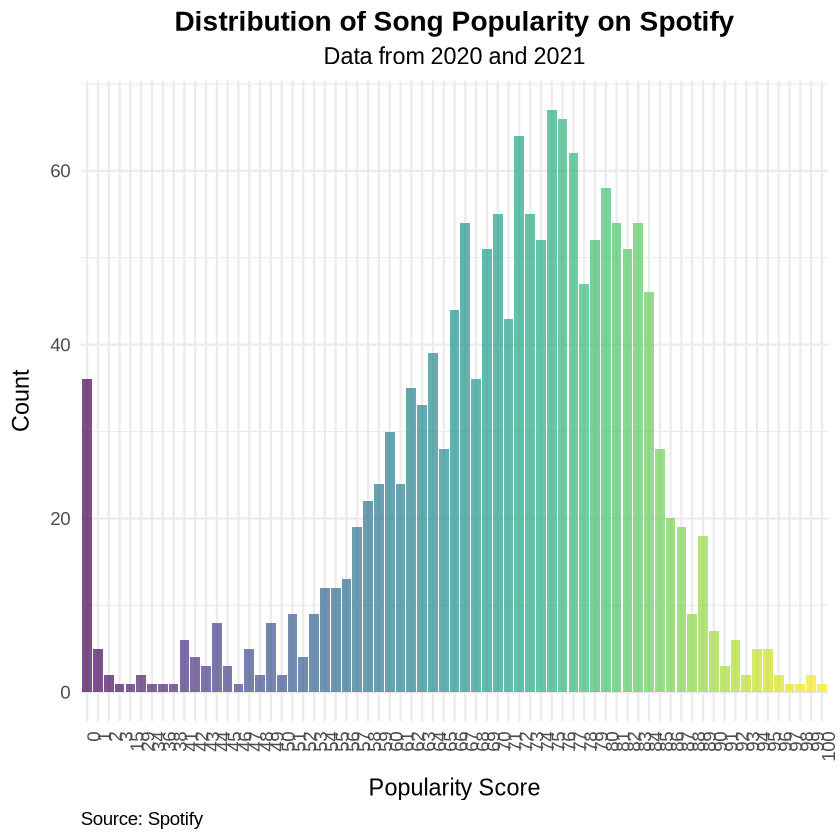

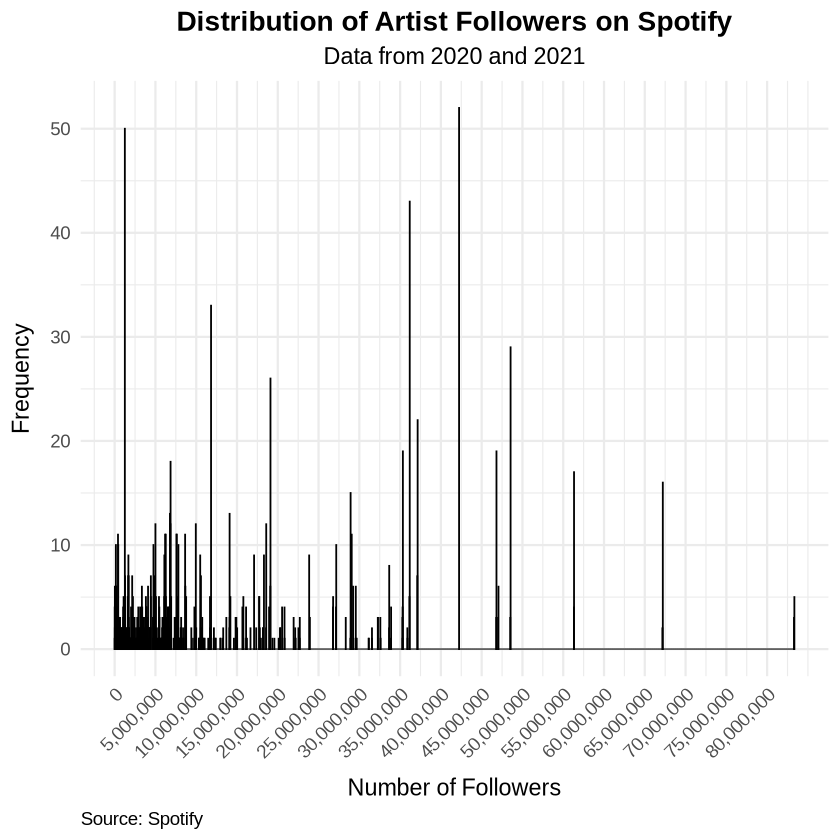

In [20]:
#Bar chart for popularity

popularity_dist <- spotify_data %>%
    ggplot(aes(x = factor(Popularity), fill = factor(Popularity))) +
    geom_bar(show.legend = FALSE, alpha = 0.7) +
    scale_fill_viridis_d() +
    labs(
        x = "Popularity Score",
        y = "Count",
        title = "Distribution of Song Popularity on Spotify",
        subtitle = "Data from 2020 and 2021",
        caption = "Source: Spotify"
    ) +
    theme_minimal(base_size = 14) +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.text.x = element_text(angle = 90, hjust = 1)
    )

popularity_dist


# Histogram for the number of followers
followers_dist <- spotify_data %>%
    ggplot(aes(x = Artist.Followers, fill = ..count..)) +
    geom_histogram(binwidth = 5000, color = "black", alpha = 0.7) +
    scale_fill_gradient(low = "lightgreen", high = "darkgreen") +
    scale_x_continuous(
        labels = scales::comma,
        breaks = seq(0, max(spotify_data$Artist.Followers, na.rm = TRUE), by = 5e6) # Breaks at every 5 million
    ) +
    labs(
        x = "Number of Followers",
        y = "Frequency",
        title = "Distribution of Artist Followers on Spotify",
        subtitle = "Data from 2020 and 2021",
        caption = "Source: Spotify"
    ) +
    theme_minimal(base_size = 14) +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none"
    )

followers_dist

For the "Distribution of Song Popularity on Spotify" graph, the histogram displayed illustrates the distribution of song popularity scores on Spotify, aggregating data from the years 2020 and 2021. Observing the shape of the distribution, which is slight left-skewed, we note a great concentration of songs falling below 1, with a gradual increase in the number of songs as the popularity score increases, until we reach a bell like curve. This skewness suggests that while most songs achieve a modest level of popularity, fewer songs reach the higher echelons of popularity scores on Spotify.

For the "Distribituion of Artist Followers on Spotify" graph, this graph visualizing the distribution of artist followers on Spotify, with data compiled from the years 2020 and 2021. Upon analysis, we notice a significant range in the number of followers, with the vast majority of followers falling below the 20 million mark while others accumulate a substantial following of 20 million plus. This indicates that a large number of artists have a relatively smaller follower base.


# A tibble: 2 × 2
  Artist.Followers.Category Mean.Popularity
  <chr>                               <dbl>
1 <= 1M                                73.6
2 > 1M                                 69.5


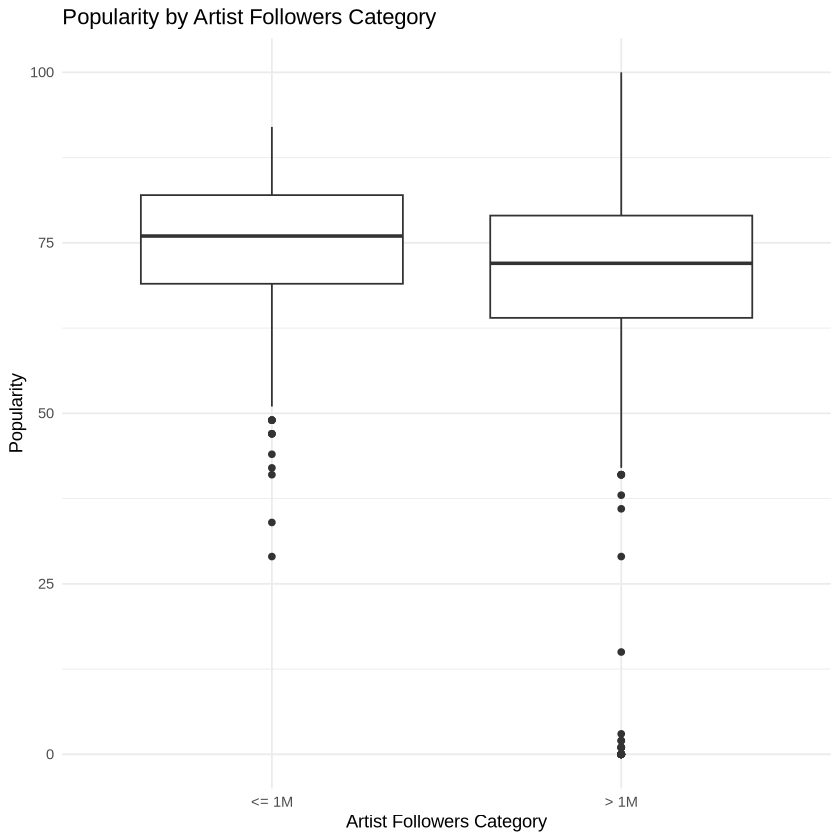

In [21]:
# Load the necessary libraries
library(tidyverse)  # for data manipulation
library(ggplot2)    # for plotting

# Remove rows with NA values in 'Artist Followers'
spotify_data <- na.omit(spotify_data)

# Categorize artists based on their number of followers
spotify_data$Artist.Followers.Category <- ifelse(spotify_data$Artist.Followers > 1000000, "> 1M", "<= 1M")

# Compute the mean popularity score for each category
mean_popularity_by_followers_category <- spotify_data %>%
  group_by(Artist.Followers.Category) %>%
  summarize(Mean.Popularity = mean(Popularity, na.rm = TRUE))

# Output the mean popularity for each category
print(mean_popularity_by_followers_category)

# Create a boxplot for visual comparison
ggplot(spotify_data, aes(x = Artist.Followers.Category, y = Popularity)) +
  geom_boxplot() +
  labs(title = "Popularity by Artist Followers Category",
       x = "Artist Followers Category", y = "Popularity") +
  theme_minimal()

This visualization demonstrates the spread and sample statistic of our two experimental categories. Within Less than 1 million, we see a mean popularity score of 73.6, while above 1 million scores a 69.5 with a higher variation in spread. The box plot visualization indicates that artists with a low follower base will typically have to have better music (popularity score) in order to even crack the top 200 list. This is indication that an artists **starpower**, from online followings, allow objectively worse songs to perform better in the global ranking. 

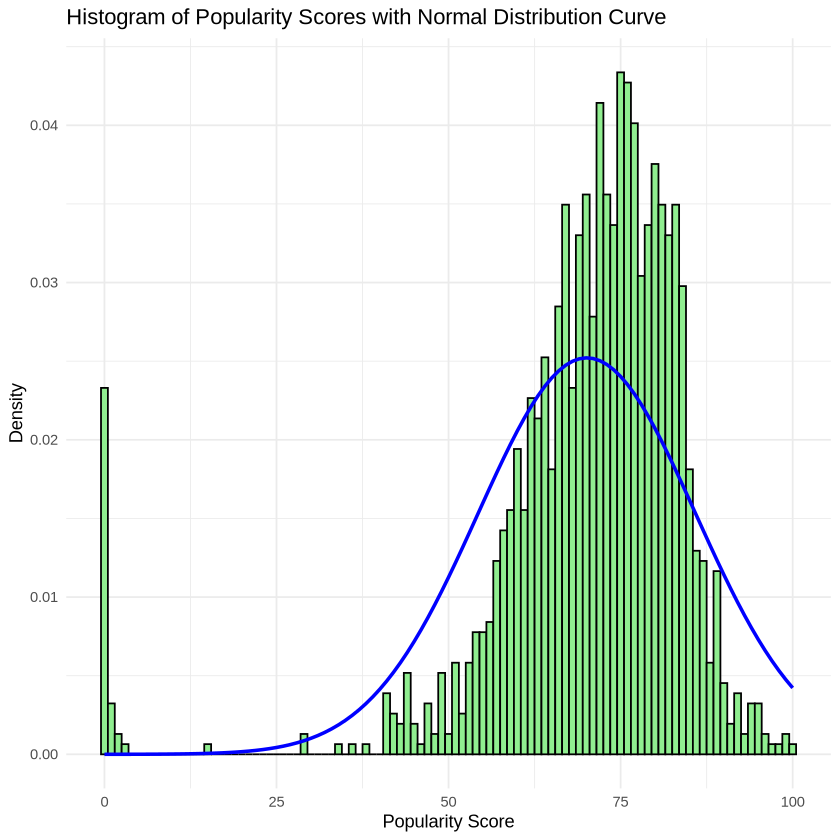

In [22]:
# Histogram with Normal Distribution Curve for Popularity
popularity_hist_with_curve <- spotify_data %>%
  ggplot(aes(x = Popularity)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "lightgreen", color = "black") +
  stat_function(fun = dnorm, args = list(mean = mean(spotify_data$Popularity, na.rm = TRUE), 
                                         sd = sd(spotify_data$Popularity, na.rm = TRUE)), 
                color = "blue", size = 1) +
  labs(x = "Popularity Score", y = "Density", 
       title = "Histogram of Popularity Scores with Normal Distribution Curve") +
  theme_minimal()

# Plot the histograms
popularity_hist_with_curve

# Methods

From our box plot, we can see that artists with more followers produce slightly less popular songs than artists with less followers. This seems quite counterintuitive - so how confident are we that this difference isn’t simply due to the nature of our sample data, and is actually significant? How sure are we of our results? 

Our preliminary testing does not give us enough evidence to be sure of the results we’ve seen so far. Therefore, we plan to conduct a hypothesis test with significance level of 0.05, as it is the standard and well used significance level (Pérez & Pericch, 2014). To do our hypothesis test, we will first confirm that our samples allow us to apply the CLT, and then conduct a two-sample t-test of our independent samples of artists with less than one million samples, and more than one million samples. We will label our sample of artists with more than 1 million followers as $x$, and our sample of artists with less than 1 million followers as $y$.

Our hypothesis test will be as follows:

$H_0$: The mean popularity of songs of artists with more than 1 million ($\mu_1$) followers is equivalent to the mean popularity of songs of artists with less than 1 million followers ($\mu_2$): $\mu_1 - \mu_2 = d_0$

$H_1$: The mean popularity of songs of artists with more than 1 million followers ($\mu_1$) is different than the mean popularity of songs of artists with less than 1 million followers: ($\mu_2$). $\mu_1 - \mu_2 \neq d_0$

We will also construct a 95% confidence interval of the difference in means of the popularity of songs between artists with more than 1 million followers and artists with less than 1 million followers. This will give us an approximation of how confident we can be in our results.

To analyze our hypothesis test, we will describe and analyze our Type I and Type II error. We will also analyze the results of our t-test in relation to our p value. Finally, we will discuss our results and provide our reflections. 

### Type I and Type II Error

Type 1 and Type 2 errors are fundamental concepts within the realm of hypothesis testing, a statistical method employed to draw meaningful conclusions about a population based on a sample of data. These errors constitute inherent facets of the statistical decision-making process, assuming a pivotal role in comprehending the inherent limitations and trade-offs associated with such analyses.

In the context of our specific hypothesis test concerning the mean popularity of songs by artists with varying follower counts, these errors manifest as follows:

Type I Error:
This occurs when our test indicates sufficient evidence to assert a difference in the mean popularity of songs between artists with over 1 million followers and those with less than 1 million followers, prompting the rejection of the null hypothesis - but yet, in reality, no such distinction exists. Essentially, it is a false positive; a misinterpretation leading to the erroneous belief in a disparity that is not present.

Type II Error:
Conversely, a Type II error arises when our test fails to show enough evidence to justify the rejection of the null hypothesis. Consequently, we are unable to conclude that there is a discernible difference in the mean popularity of songs between artists with over 1 million followers and those with less than 1 million followers. In reality, however, a genuine difference does exist. This error represents a false negative, a failure to detect an actual distinction.

### Pre-Requisites for Theory-Based Approaches

In our exploration of means, it's imperative to ensure that our samples, whether from artists with less than one million followers or those with more than one million followers, boast a substantial size. In most instances, a sample size of around 30 is considered ideal.

Upon computation, we find that the sample size for songs by artists with fewer than one million followers is 217, while for those with over one million followers, it stands at 1328. Fortunately, both sample sizes surpass the recommended threshold, signaling the application of the Central Limit Theorem (CLT). This enables us to confidently employ theory-based approaches in our analysis.

In [23]:
less_than_million <- spotify_data |>
                        filter(Artist.Followers < 1000000) |>
                        select(Artist.Followers, Popularity)

more_than_million <- spotify_data |>
                        filter(Artist.Followers > 1000000) |>
                        select(Artist.Followers, Popularity)

print(paste0("Number of artists with fewer than 1 million followers: ", nrow(less_than_million)))
print(paste0("Number of artists with more than 1 million followers: ", nrow(more_than_million)))

[1] "Number of artists with fewer than 1 million followers: 217"
[1] "Number of artists with more than 1 million followers: 1328"


In [24]:
print("Artists with fewer than 1 million followers:")
head(less_than_million)
print("Artists with more than 1 million followers:")
head(more_than_million)

[1] "Artists with fewer than 1 million followers:"


Artist.Followers Popularity
1 151486           91        
2  83689           92        
3 365975           89        
4 375865           89        
5 389076           89        
6  45362           88

[1] "Artists with more than 1 million followers:"


Artist.Followers Popularity
1  3377762         100       
2  2230022          99       
3  6266514          99       
4 83293380          98       
5  5473565          96       
6  5473565          97

### Formulas for the Test Statistic and Degree of Freedom of Null Model

As we are working with 2 independent population means, we would use these formula of:

Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

## Calculating Statistics


To conduct our analysis using the earlier formula, it's advantageous to have all the necessary data ready in advance. This way, we can readily apply the formula when needed, optimizing our efficiency in the analytical process.

Thus, we first list all of our data out for convenience sake: 

In [25]:
x_bar <- mean(more_than_million$Popularity)
y_bar <- mean(less_than_million$Popularity)
s_1 <- sd(more_than_million$Popularity)
s_2 <- sd(less_than_million$Popularity)
n_1 <- nrow(more_than_million)
n_2 <- nrow(less_than_million)

Now we can calculate our statistics. 

### Calculating the Test Statistic and Degrees of Freedom

In [26]:
test_statistic <- (x_bar - y_bar - 0)/sqrt((s_1)^2/n_1+(s_2)^2/n_2)

v <- (((s_1)^2/n_1)+((s_2)^2/n_2))^2/(((s_1)^4)/(n_1^2*(n_1 - 1)) + ((s_2)^4)/(n_2^2*(n_2 - 1)))

print(paste0("Test statistic: ", test_statistic))
print(paste0("Degrees of Freedom: ", v))

[1] "Test statistic: -4.66170774553032"
[1] "Degrees of Freedom: 386.195986547174"


### Calculating p-value based on Test Statistic and Degrees of Freedom

In [31]:
# 2x because two sided, lower.tail = TRUE, because the test statistics < 0
p_value <- 2 * pt(test_statistic, v, lower.tail = TRUE)

print(paste0("p-value: ", p_value))

[1] "p-value: 4.32557131729671e-06"


Just to be sure that our p value is correct, we use the R library's `t.test` function to compare. 

In [32]:
statistics_r <- 
    tidy(
        t.test(x = more_than_million$Popularity,
               y = less_than_million$Popularity,
               alternative ="two.sided"))

p_value_r <- statistics_r$p.value

print(paste0("p-value from t.test: ", p_value_r))

[1] "p-value from t.test: 4.32557131729672e-06"


Our results are the same, so we continue on to create a 95% confidence interval, and analyze our results together at the end.

# Confidence Interval of the Difference

Upon establishing that a difference exists, the natural next question is: how significant is this difference? Pinpointing a precise value for the mean difference may be elusive, but a robust alternative is constructing a confidence interval. By doing so, we can express our confidence, at a 95% level in this case, that the true difference lies within this interval. This approach provides a more nuanced understanding of the range within which the actual disparity in means is likely to fall.

To undertake this, two key elements are pivotal: the mean difference from our two samples and the standard deviation derived from its distribution, based on a t-distribution with the degrees of freedom from our earlier analysis. The standard deviation - or as we can call it in this case, the standard error - can be computed using the formula:
 
$$
SE = {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$ 

First let's gather all the values we'll need in one place:

In [29]:
difference <- x_bar - y_bar
se <- sqrt((s_1)^2/n_1+(s_2)^2/n_2)

Now let's calculate the 95% confidence interval:

In [30]:
# Making a tibble with the lower CI and upper CI

lower_ci <- difference - qt(0.975, v) * se

upper_ci <- difference + qt(0.975, v) * se

ci_table <- tibble(lower_ci, upper_ci)
ci_table

lower_ci  upper_ci 
1 -5.851161 -2.379705

Now we begin our discussion of our reuslts.

# Discussion

## Analysis of p-value obtained from test statistic and degrees of freedom

Given that the p-value obtained from our test statistics (4.325e-06) is below our chosen significance level of 0.05, we have substantial evidence to reject the null hypothesis. This leads us to conclude that there is a significant difference in the popularity of songs from artists with more than one million followers compared to those with followers below one million.

It's important to note that with this conclusion, there is a 5% probability of committing a Type I error. In other words, there's a 5% chance that we might have falsely identified a difference when, in reality, there isn't one.

## Analysis of Confidence Interval

Our analysis shows that at a 95% confidence level, suggests a confidence interval ranging from -5.811 to -2.379. This indicates a 95% probability that the actual average difference in song popularity between artists with over a million followers and those with fewer lies within this range.

The negative sign in our confidence interval, indicating an average lower popularity of songs from artists with more than one million followers compared to those with fewer, suggests a possible inverse relationship between follower count and song popularity. This could imply that a larger follower base does not necessarily equate to higher song popularity, potentially due to factors like varying audience preferences, evolving music trends, or different expectations from popular artists.

The direction and magnitude of the observed disparity in song popularity, as reflected in our confidence interval, reveal a notable trend. Artists with fewer followers tend to have more popular songs, with the magnitude of this disparity being substantial. This insight could be pivotal in understanding the dynamics of the music industry, including the impact of digital platforms on emerging artists and the evolving behavior of music consumer.

## Practical Implications and Reflections:
These findings challenges the prevalent assumption that higher artist follower counts directly translate to greater song popularity. It suggests that smaller artists may have an advantage in achieving higher popularity scores, potentially due to factors beyond follower count, such as niche audience appeal or distinct musical characteristics. 

Our results also bring up future questions of what other characteristics make a song more popular - for example, acoustic properties of songs, like its energy levels or how positive/negative the song sounds. Also, we could analyze how the popularity of artists (ie their following) changes in relation to the popularity of their songs. One thing to note about our analysis in general is that for many artists, being popular to the general music-consuming population is not their end goal - thus, our analysis may not be relavent to artists who, say, tailor their music to a very small, specific audience. 

## Limitations and Further Exploration:
It's important to acknowledge limitations, such as the scope of the analysis focusing solely on Spotify data. Future research could explore additional platforms or consider more nuanced factors influencing song popularity to gain a comprehensive understanding.

In summary, the analysis underscores the complex relationship between artist follower counts and song popularity. The results not only challenge conventional beliefs but also highlight the need for a deeper understanding of multifaceted influences on music consumption and popularity in the digital age.



# References

Aguiar, L., Waldfogel, J. Platforms, Promotion, and Production Discovery: Evidence from Spotify Playlists. (2018). *National Bureau of Economic Research.* doi:10.3386/w24713. 

Pérez, M., & Pericchi, L. R. (2014). Changing statistical significance with the amount of information: The adaptive α significance level. Statistics & Probability Letters, 85, 20-24. https://doi.org/10.1016/j.spl.2013.10.018

Soares Araujo, C. V., Pinheiro de Cristo,  M. A., and Giusti, R. Predicting Music Popularity Using Music Charts. (2019). *18th IEEE International Conference On Machine Learning And Applications (ICMLA)*. pp. 859-864, doi:10.1109/ICMLA.2019.00149. 

Spotify Dataset: 
https://github.com/cinadia/stat-201-project/blob/main/data/spotify_dataset.csv
